In [1]:
import pandas as pd
import numpy as np

In [2]:
# File path for carbon intensity dataset
PATH = "C:/Users/Krist/OneDrive/Documents/Data Analysis/Practice/Carbon/data/processed/df_carbon.parquet"

# Keeps the DATETIME column as an index
df_carbon = pd.read_parquet(PATH)

# Keep records within the modern period due to less fluctuation in data readings (determined in Notebook 02)
df_carbon = df_carbon[df_carbon.index >= "2020-01-01"]

# Train Validation Test Splits

In [3]:
train = df_carbon.loc["2020":"2023"]
val   = df_carbon.loc["2024"]
test  = df_carbon.loc["2025"]

# Implement baselines

In [4]:
# Naive (t−1)
def naive_forecast(series):
    return series.shift(1)

In [5]:
# Daily seasonal (t−24)
def daily_forecast(series):
    return series.shift(24)

In [6]:
# Weekly seasonal (t−168)
def weekly_forecast(series):
    return series.shift(168)

In [7]:
y_train = train["CARBON_INTENSITY"]
y_val   = val["CARBON_INTENSITY"]
y_test  = test["CARBON_INTENSITY"]

pred_naive  = naive_forecast(df_carbon["CARBON_INTENSITY"])
pred_daily  = daily_forecast(df_carbon["CARBON_INTENSITY"])
pred_weekly = weekly_forecast(df_carbon["CARBON_INTENSITY"])

# Evaluation (MAE + RMSE)

In [8]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

def evaluate(y_true, y_pred):
    mae = mean_absolute_error(y_true, y_pred)
    rmse = np.sqrt(mean_squared_error(y_true, y_pred))
    return mae, rmse

In [9]:
results = {}

for name, pred in [
    ("Naive (t-1)", pred_naive),
    ("Daily (t-24)", pred_daily),
    ("Weekly (t-168)", pred_weekly),
]:
    mae_val, rmse_val = evaluate(y_val, pred.loc[val.index])
    mae_test, rmse_test = evaluate(y_test, pred.loc[test.index])
    
    results[name] = {
        "MAE_val": mae_val,
        "RMSE_val": rmse_val,
        "MAE_test": mae_test,
        "RMSE_test": rmse_test
    }

results

{'Naive (t-1)': {'MAE_val': 8.178847905282332,
  'RMSE_val': np.float64(11.59464989523523),
  'MAE_test': 8.723285384022605,
  'RMSE_test': np.float64(12.075835753463135)},
 'Daily (t-24)': {'MAE_val': 40.18767076502732,
  'RMSE_val': np.float64(52.682560276921926),
  'MAE_test': 38.287760082198815,
  'RMSE_test': np.float64(50.08094943464397)},
 'Weekly (t-168)': {'MAE_val': 56.23064663023679,
  'RMSE_val': np.float64(71.54024742315418),
  'MAE_test': 56.61861032622656,
  'RMSE_test': np.float64(72.80247385271508)}}

# Actual vs Predicted

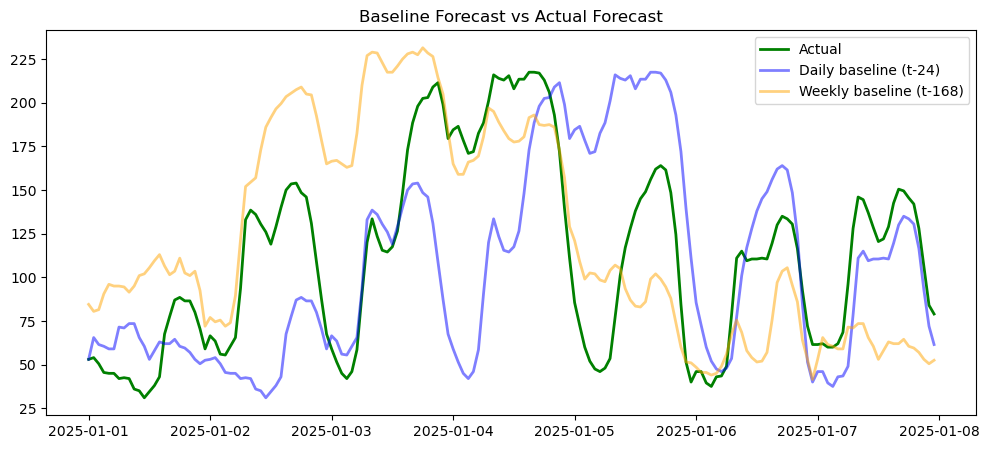

In [18]:
sample = test.iloc[:24*7]  # first week

import matplotlib.pyplot as plt
plt.figure(figsize=(12,5))

plt.plot(sample.index, sample["CARBON_INTENSITY"], label="Actual", color="Green", linewidth=2)
plt.plot(sample.index, pred_daily.loc[sample.index], label="Daily baseline (t-24)", color="Blue", linewidth=2, alpha=0.5)
plt.plot(sample.index, pred_weekly.loc[sample.index], label="Weekly baseline (t-168)", color="Orange", linewidth=2, alpha=0.5)

plt.legend()
plt.title("Baseline Forecast vs Actual Forecast")
plt.show()

In [30]:
series = df_carbon["CARBON_INTENSITY"]

sample = series.loc["2023-02-01":"2023-02-05"]

sample_baseline_24  = series.shift(24).loc[sample.index]
sample_baseline_168 = series.shift(168).loc[sample.index]

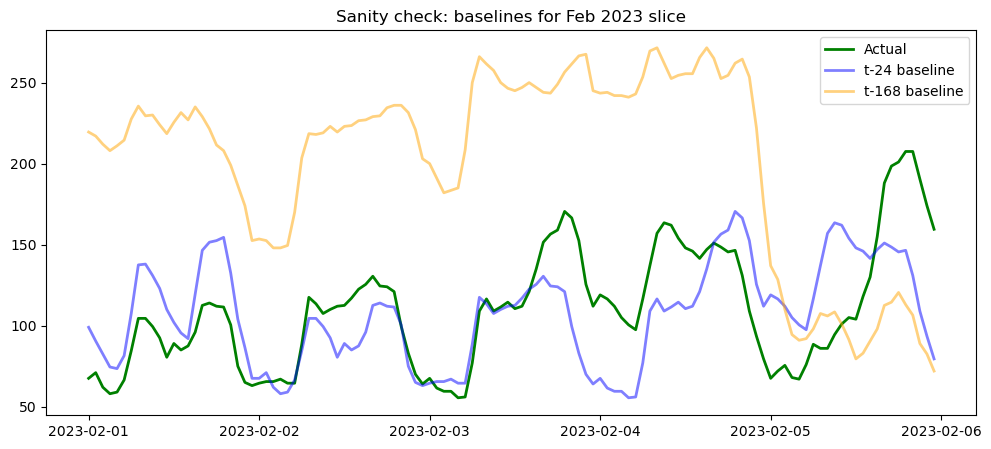

In [32]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 5))
plt.plot(sample.index, sample.values, label="Actual", color="Green", linewidth=2)
plt.plot(sample.index, sample_baseline_24.values, label="t-24 baseline", color="Blue", linewidth=2, alpha=0.5)
plt.plot(sample.index, sample_baseline_168.values, label="t-168 baseline", color="Orange", linewidth=2, alpha=0.5)
plt.legend()
plt.title("Sanity check: baselines for Feb 2023 slice")
plt.show()